# <center> Майнор "Интеллектуальный анализ данных" </center>

# <center> Курс "Введение в анализ данных" </center>

# <center> Лабораторная работа №1. Обработка и первичный анализ данных </center>

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import random
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
import sklearn.model_selection

In [3]:
import warnings
warnings.simplefilter('ignore')

from matplotlib import rcParams

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/katearb/files/main/students_data.csv")
data.shape

(1044, 36)

In [6]:
data.head(10)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

<br>  

## Задания

**NB:** Обратите внимание, что часть студентов посещают оба курса и представлены в данных два раза. Из-за этого некоторые результаты анализа могут быть искажены. Имеет смысл выявить таких студентов заранее ([Задание 11](#task11)) и учитывать эту информацию при анализе.

### Задание 1  
  
 * Для каждого признака определите, к какому типу он относится.   
 * Проверьте значения признаков на наличие опечаток и ошибок, исправьте их.<br>
   __Note:__ Исправлять ошибки нужно программно, модифицировать руками исходный файл нельзя.
 * При необходимости, приведите признак к определенному вами типу.

In [8]:
# дефолтные типы признаков
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          1044 non-null   int64  
 1   Subject     1044 non-null   object 
 2   school      1044 non-null   object 
 3   sex         1044 non-null   object 
 4   age         1044 non-null   int64  
 5   address     1044 non-null   object 
 6   famsize     1044 non-null   object 
 7   Pstatus     1044 non-null   object 
 8   Medu        1044 non-null   object 
 9   Fedu        1044 non-null   object 
 10  Mjob        1044 non-null   object 
 11  Fjob        1044 non-null   object 
 12  reason      1044 non-null   object 
 13  guardian    1044 non-null   object 
 14  traveltime  1044 non-null   int64  
 15  studytime   1044 non-null   int64  
 16  failures    1044 non-null   int64  
 17  schoolsup   1044 non-null   object 
 18  famsup      1044 non-null   object 
 19  paid        1044 non-null  

Найдем опечатки и исправим их.

In [10]:
cols = list(data.columns)[1:]

for col in cols:
    print(col, list(data[col].unique()))

Subject ['Por', 'Math']
school ['GP', 'MS']
sex ['F', 'M', 'm']
age [16, 17, 18, 15, 19, 21, 20, 22]
address ['U', 'R']
famsize ['GT3', 'LE3']
Pstatus ['A', 'T', 't']
Medu ['3', '1', '2', '4', '0', 'o']
Fedu ['4', '2', '3', '1', 'o', '0']
Mjob ['services', 'other', 'health', 'at_home', 'teacher', 'at-home']
Fjob ['other', 'services', 'health', 'at-home', 'teacher', 'at_home']
reason ['course', 'home', 'reputation', 'other']
guardian ['father', 'mother', 'other', 'futher']
traveltime [1, 2, 3, 4]
studytime [1, 2, 4, 3]
failures [0, 2, 1, 3]
schoolsup ['no', 'yes']
famsup ['no', 'yes']
paid ['no', 'yes']
activities ['no', 'yes']
nursery ['yes', 'no']
higher ['yes', 'no']
internet ['yes', 'no']
romantic ['no', nan, 'yes']
famrel [3.0, 5.0, 4.0, 1.0, 2.0, nan]
freetime [2, 3, 4, 1, 5]
goout [1, 4, 5, 3, 2]
Dalc [1.0, 3.0, 4.0, 2.0, 5.0, nan]
Walc [4.0, 3.0, 5.0, 1.0, 2.0, nan]
health [5, 3, 4, 2, 1]
absences [12, 2, 0, 4, 6, 10, 7, 20, 14, 11, 24, 8, 16, 21, 1, 18, 5, 22, 9, 3, 15, 26, 25,

In [11]:
data['sex'].replace(to_replace='m', value='M', inplace=True)
data['Pstatus'].replace(to_replace='t', value='T', inplace=True)
data['Mjob'].replace(to_replace='at-home', value='at_home', inplace=True)
data['Fjob'].replace(to_replace='at-home', value='at_home', inplace=True)
data['guardian'].replace(to_replace='futher', value='father', inplace=True)

data['Medu'] = data['Medu'].map({'1': 1, '2': 2, '3': 3, '4': 4, '0': 0, 'o': 0})
data['Fedu'] = data['Fedu'].map({'1': 1, '2': 2, '3': 3, '4': 4, '0': 0, 'o': 0})


Из таблицы с информацией о признаках ясно, что многие из них приведены к категориальному типу.

Некоторые признаки имеют только 2 значения (yes|no) -- приведем их к булевому типу.

In [12]:
cat_columns = [ 'school', 'Subject', 'Mjob', 'Fjob', 'reason', 'guardian',
       'traveltime', 'studytime', 'failures', 'Subject', 'school']

for col in cat_columns:
    data[col] = data[col].astype('category')
    
binary_columns = ['schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic']

for col in binary_columns:
    data[col] = data[col].map({'yes': True, 'no': False})
    data[col] = data[col].astype('bool')
    
int_columns = ['Medu', 'Fedu','famrel', 'freetime','goout', 'Dalc', 'Walc', 'health']

for col in binary_columns:
    data[col] = data[col].astype('int64')

data['sex'] = data['sex'].map({'M': True, 'F': False}).astype('bool')
data['address'] = data['address'].map({'U': True, 'R': False}).astype('bool')
data['famsize'] = data['famsize'].map({'GT3': True, 'LE3': False}).astype('bool')
data['Pstatus'] = data['Pstatus'].map({'T': True, 'A': False}).astype('bool')
data['cheating'] = data['cheating'].map({'yes': True, 'no': False})



In [13]:
data

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,False,16,True,True,False,3,4,services,other,course,father,1,1,0,0,0,0,0,1,1,1,0,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,False,17,True,True,True,3,2,other,other,course,mother,1,2,0,0,0,0,1,0,1,1,0,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,True,16,True,False,True,1,2,health,services,course,mother,2,1,2,0,0,0,0,0,1,1,0,4.0,4,5,3.0,5.0,5,0,True,9,8,10
3,102989,Por,MS,True,17,True,True,True,2,3,other,services,home,father,2,2,0,0,0,0,1,1,1,1,0,4.0,4,3,1.0,1.0,3,4,False,14,15,16
4,103131,Por,GP,False,16,True,True,True,1,1,at_home,other,home,mother,2,1,0,0,1,0,0,1,1,0,1,4.0,3,2,1.0,4.0,5,2,True,12,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,997832,Math,GP,False,15,False,True,True,3,3,services,services,reputation,other,2,3,2,0,1,1,1,1,1,1,1,4.0,2,1,2.0,3.0,3,8,NaN,10,10,10
1040,997897,Por,GP,True,15,False,True,True,2,1,health,services,reputation,mother,1,2,0,0,0,0,1,1,1,1,1,5.0,4,2,1.0,1.0,5,4,False,10,9,10
1041,998425,Por,MS,False,16,False,False,True,1,1,at_home,other,course,father,3,2,0,0,1,0,0,1,1,0,0,5.0,3,2,NaN,1.0,1,0,False,16,17,18
1042,999143,Por,GP,True,16,True,True,True,2,1,at_home,other,course,mother,4,1,0,0,0,0,0,1,1,0,0,3.0,2,1,1.0,1.0,2,4,NaN,9,9,11


Так как в нашей таблице могут встречаться одни и те же люди, посещающие 2 курса одновременно, по признакам, не относящимся к конкретному курсу и оценкам по этим предметам, найдем этих людей и присвоим им уникальные идентификаторы в колонке "person_id"

In [13]:
group_vars = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'schoolsup','famsup', 'activities',  'nursery', 'higher', 'internet','romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']
data['info'] = ['0' for i in range(1044)]

for i in range(1044):
    data.at[i, 'info'] = str([data.at[i, g] for g in group_vars])

le = LabelEncoder()
data['person_id'] = le.fit_transform(data['info'])+1

del data['info']

data.sort_values('person_id')

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3,person_id
557,577678,Math,GP,False,15,False,False,True,2,2,health,services,reputation,mother,2,2,0,1,1,1,0,1,1,1,0,4.0,1,3,1.0,3.0,4,2,NaN,8,9,8,1
716,718669,Por,GP,False,15,False,False,True,2,2,health,services,reputation,mother,2,2,0,1,1,0,0,1,1,1,0,4.0,1,3,NaN,3.0,4,0,NaN,11,10,11,2
904,882687,Por,GP,False,15,False,False,True,3,1,other,other,reputation,father,2,4,0,0,1,0,0,0,1,1,0,4.0,4,2,2.0,3.0,3,6,NaN,15,15,15,3
69,155408,Math,GP,False,15,False,False,True,3,1,other,other,reputation,father,2,4,0,0,1,0,0,0,1,1,0,4.0,4,2,2.0,3.0,3,12,False,16,16,16,3
753,743818,Por,GP,False,15,False,True,True,1,1,at_home,other,home,mother,2,4,0,1,1,1,1,1,1,1,0,3.0,1,2,1.0,1.0,1,4,NaN,13,13,13,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,907470,Por,MS,True,19,True,True,True,2,1,at_home,other,course,other,2,1,3,0,0,0,1,0,0,1,1,4.0,4,3,1.0,3.0,5,4,NaN,8,9,9,697
41,135230,Por,MS,True,19,True,True,True,3,2,at_home,services,course,mother,2,1,3,0,0,0,1,1,1,0,0,3.0,2,1,1.0,1.0,3,4,NaN,6,11,9,698
742,736856,Por,MS,True,20,False,True,True,1,1,other,other,course,other,2,1,1,0,1,0,0,1,0,1,1,4.0,4,3,2.0,4.0,4,12,True,8,11,10,699
369,417336,Math,MS,True,20,True,False,False,2,2,services,services,course,other,1,2,2,0,1,1,0,1,1,0,0,5.0,5,4,4.0,5.0,4,11,NaN,9,9,9,700


Выведем строки с повторяющимися person_id

In [14]:
ids = data['person_id']
data[ids.isin(ids[ids.duplicated()])].sort_values('person_id')

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3,person_id
69,155408,Math,GP,False,15,False,False,True,3,1,other,other,reputation,father,2,4,0,0,1,0,0,0,1,1,0,4.0,4,2,2.0,3.0,3,12,False,16,16,16,3
904,882687,Por,GP,False,15,False,False,True,3,1,other,other,reputation,father,2,4,0,0,1,0,0,0,1,1,0,4.0,4,2,2.0,3.0,3,6,NaN,15,15,15,3
552,575028,Math,GP,False,15,False,True,True,1,1,at_home,other,home,mother,2,4,1,1,1,1,1,1,1,1,0,3.0,1,2,1.0,1.0,1,2,NaN,7,10,10,4
753,743818,Por,GP,False,15,False,True,True,1,1,at_home,other,home,mother,2,4,0,1,1,1,1,1,1,1,0,3.0,1,2,1.0,1.0,1,4,NaN,13,13,13,4
755,744503,Por,GP,False,15,False,True,True,1,1,other,other,reputation,mother,1,2,0,1,1,0,0,0,1,1,1,3.0,3,4,2.0,4.0,5,2,False,13,11,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,516232,Por,MS,True,18,True,True,True,4,4,teacher,teacher,home,father,1,2,0,0,0,0,1,0,1,1,0,3.0,2,4,1.0,4.0,2,4,NaN,17,18,19,690
911,890351,Math,MS,True,19,False,True,True,1,1,other,services,home,other,3,2,3,0,0,0,0,1,1,1,0,5.0,4,4,3.0,3.0,2,8,NaN,8,7,8,693
54,143425,Por,MS,True,19,False,True,True,1,1,other,services,home,other,3,2,1,0,0,0,0,1,1,1,0,5.0,4,4,3.0,3.0,2,8,NaN,10,9,11,693
352,396378,Por,MS,True,19,False,True,True,1,1,other,services,other,mother,2,1,1,0,0,0,0,1,1,0,0,4.0,3,2,1.0,3.0,5,0,False,5,8,0,694


Проверим, что каждой паре "person_id" coответствуют записи с разными предметами. Количество записей с Por  и с Math должно совпадать

In [15]:
person_id_list = list(data['person_id'])
i_list = []
for i in range(len(set(person_id_list))):
    if person_id_list.count(i) == 2:
        i_list.append(i)
data.sort_values('person_id')
data[data['person_id'].isin(i_list)].sort_values('person_id')['Subject'].value_counts()

Por     345
Math    341
Name: Subject, dtype: int64

Не совпадает:( Посмотрим на строки с одним индентификатором и одним и тем же прредметом

In [16]:

for i in range(len(set(person_id_list))):
    if person_id_list.count(i) == 2:
        math_only = False in list(data[data['person_id'] == i]['Subject']) and True not in list(data[data['person_id'] == i]['Subject'])
        por_only = True in list(data[data['person_id'] == i]['Subject']) and False not in list(data[data['person_id'] == i]['Subject'])
        if math_only or por_only:
                print(i)

In [17]:
data[data['person_id'] == 520]

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3,person_id
632,640904,Por,MS,False,16,True,True,True,1,2,other,services,course,mother,1,3,1,0,1,0,0,1,1,0,0,1.0,3,2,1.0,2.0,4,3,NaN,9,8,8,520
699,705300,Por,MS,False,16,True,True,True,1,2,other,services,course,mother,1,3,1,0,1,0,0,1,1,0,0,1.0,3,2,1.0,2.0,4,0,NaN,10,8,8,520


In [18]:
data[data['person_id'] == 619]

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3,person_id
741,736116,Por,MS,True,15,False,False,True,4,1,health,services,reputation,father,1,2,0,0,1,0,1,1,1,1,0,5.0,3,4,1.0,2.0,2,7,False,7,9,8,619
858,840595,Por,MS,True,15,False,False,True,4,1,health,services,reputation,father,1,2,0,0,1,0,1,1,1,1,0,5.0,3,4,1.0,2.0,2,0,NaN,12,13,14,619


Строки и правда совпадают по выбранным нами параметрам, однако отличаются оценками по одному и тому же предмету (значит, это не дубликаты). Присвоим им уникальные идентификаторы вручную.

In [19]:
data.at[520, 'person_id'] = 704
data.at[619, 'person_id'] = 705

### Задание 2  
  
Проверьте, присутствуют ли в данных пропущенные значения. Сколько? В каких признаках?  
По каждому такому признаку предложите и обоснуйте, что делать с пропущенными значениями.

In [20]:
nulls = data.isnull().sum()
nulls[nulls > 0]

famrel       10
Dalc         10
Walc         10
cheating    700
dtype: int64

Построим таблицу корреляций на основе данных, не содержащих Nan, чтобы выяснить, от каких признаков зависят столбцы с пропущенными значениями.

In [21]:
#приводим данные к чиловым значениям
numeric_data = data.copy()[['Subject', 'school', 'sex', 'age', 'address', 'famsize',
                           'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian',
                           'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
                           'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
                           'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'cheating',
                           'G1', 'G2', 'G3']]


categories = {'guardian': ['father', 'mother', 'other'],
              'Mjob': ['other', 'services', 'health', 'teacher', 'at_home'],
              'Fjob': ['other', 'services', 'health', 'teacher', 'at_home'],
              'reason': ['course', 'home', 'reputation', 'other'], 
              'Subject': ['Por', 'Math'],
               'school': ['GP', 'MS']}

for cat in categories:
    for ind, v in enumerate(categories[cat]):
        numeric_data[cat].replace(to_replace=v, value=ind, inplace=True)
    
numeric_data['cheating'] = numeric_data['cheating'].map({True: 1, False: 0}) # будем считать, что пропущенное
                                                                                            # значение == "не списывал"

numeric_data_dropna = numeric_data.dropna()

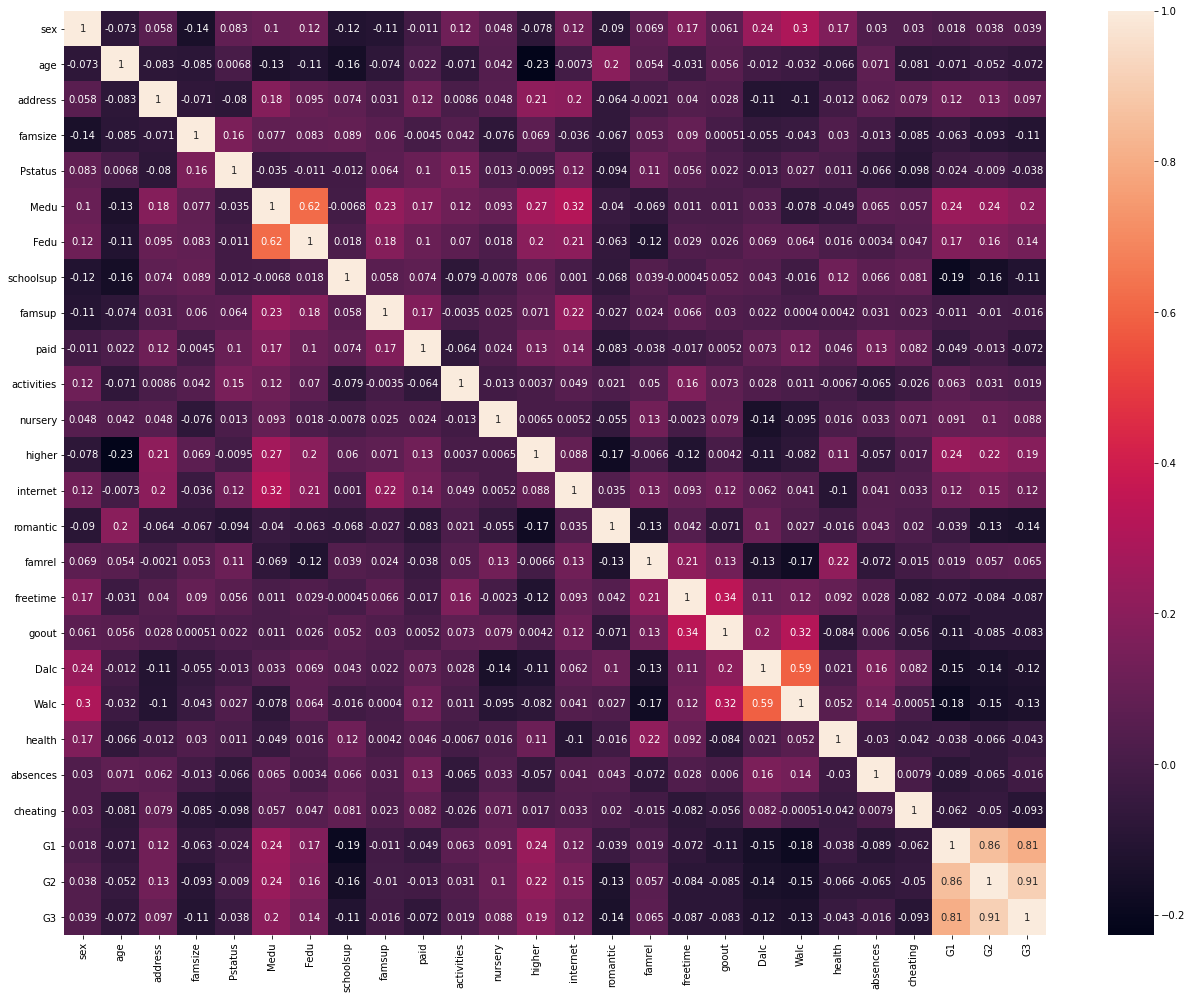

In [22]:
data_corr = numeric_data_dropna.corr()
plt.figure(figsize=(22, 17))
sns.heatmap(data_corr, annot=True)
plt.ylim((data_corr.shape[0], 0)) # fixes bug in matplotlib 3.1.1, should be removed in other versions

plt.show()

##### Комментарий
Соответственно таблице корреляций, небольшая обратная зависимость наблюдается между cheating-G3 и cheating-Pstatus.
В столбце cheating возможно восстановить некоторые значения, опираясь на запись о том же человеке, но по другому предмету (если такая запись имеется).
Остальные значения восстановим в соответствии с таблицей кореляций.

In [23]:
data_no_na = data.copy()

for i in range(817):
    if person_id_list.count(i) == 2 and np.nan in list(data_no_na[data_no_na['person_id'] == i]['cheating']):

        if list(data_no_na[data_no_na['person_id'] == i]['cheating']).count(True) == 1:
            data_no_na.loc[data_no_na['person_id'] == i, 'cheating'] = True
        elif list(data_no_na[data['person_id'] == i]['cheating']).count(False) == 1:
            data_no_na.loc[data_no_na['person_id'] == i, 'cheating'] = False
    
for i in range(1044):
    if data_no_na.iloc[i]['cheating'] in [True, False]:
        continue
        
    if data_no_na.iloc[i]['G3'] in range(11) and not data_no_na.iloc[i]['Pstatus']:
        data_no_na.at[i, 'cheating'] = random.choices([True, False], weights=[70, 30])[0]
    elif (data_no_na.iloc[i]['G3'] in range(11, 16) and data_no_na.iloc[i]['Pstatus']) or \
         (data_no_na.iloc[i]['G3'] in range(16, 21) and not data_no_na.iloc[i]['schoolsup']):
        data_no_na.at[i, 'cheating'] = random.choices([True, False], weights=[60, 40])[0]

    else:
        data_no_na.at[i, 'cheating'] = random.choices([True, False], weights=[30, 70])[0]

В таблице наблюдается корреляция между Dalc и Walc. Восстановим пропущенные значения в таблице в соответствии с этим, так как строки с пропущенными значениями в обоих колонках не пересекаются.

In [24]:
for i in data_no_na[data_no_na['Walc'].isnull()].index:
    data_no_na.at[i, 'Walc'] =  data_no_na.at[i, 'Dalc']
    
for i in data[data['Dalc'].isnull()].index:
    data_no_na.at[i, 'Dalc'] =  data_no_na.at[i, 'Walc']
    
data_no_na['Walc'] = data_no_na['Walc'].astype('int32')
data_no_na['Dalc'] = data_no_na['Dalc'].astype('int32')

Famrel находятся в небольшой зависимости с internet, Pstatus, nursery и в обратной зависимости с romantic.

In [25]:
for i in data_no_na[data_no_na['famrel'].isnull()].index:
    row = data_no_na.iloc[i]
    if row['internet'] and row['Pstatus'] and row['nursery'] and not row['romantic']:
        data_no_na.at[i, 'famrel'] = 5
    elif row['internet'] or row['Pstatus'] or row['nursery'] or not row['romantic']:
         data_no_na.at[i, 'famrel'] = random.choice([3, 4])
    else:
        data_no_na.at[i, 'famrel'] = random.choice([1, 2])
        
data_no_na['famrel'] = data_no_na['famrel'].astype('int32')

### Задание 3  
  
Проанализируйте данные на наличие выбросов.   
Сколько наблюдений можно отнести к выбросам по каждому признаку? Сколько всего выбросов в данных?  
  
**Note:** Выбросы можно не удалять из данных. Это информацию можно учитывать в дальнейшем анализе и удалять выбросы при необходимости. 

<AxesSubplot:>

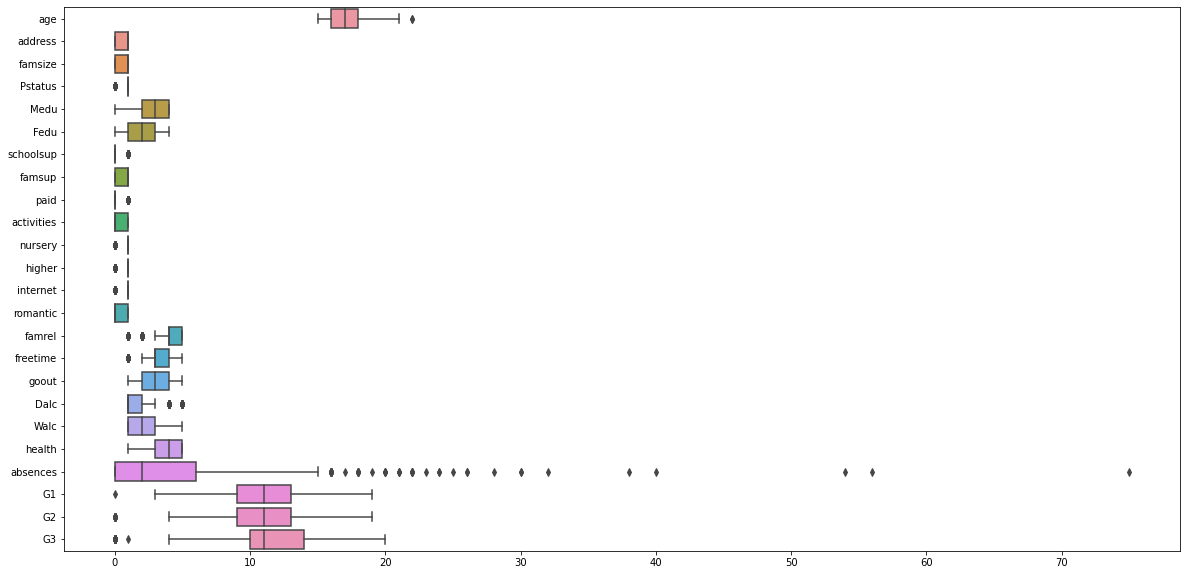

In [27]:
rcParams['figure.figsize'] = 20, 10
int_data = data.copy()[['age', 'address', 'famsize',
                 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason',
                 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
                 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
                 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
                 'G1', 'G2', 'G3']].dropna()

categories = {'Mjob': ['other', 'services', 'health', 'teacher', 'at_home'],
              'Fjob': ['other', 'services', 'health', 'teacher', 'at_home'],
              'reason': ['course', 'home', 'reputation', 'other']}

for cat in categories:
    for ind, v in enumerate(categories[cat]):
        int_data[cat].replace(to_replace=v, value=ind, inplace=True)

    int_data[col] = int_data[col].astype('int64')

sns.boxplot(data=int_data, orient='h')

##### Комментарий:
Для проверки на выбросы исключим колонки ID (за ненадобностью) и cheating (из-за большого количества Nan).

В признаке age наблюдаем 1 выброс при age=22.

Наблюдаем выбросы в нескольких булевых призаках (принимающих значения только yes|no). Это говорит лишь о том, что один из вариантов является более частотным, чем второй. Предлагаю такие значения не считать выбросами, поскольку в таком случае признак теряет смысл при наличии в нем только одного значения.

 Наибольшее количество выбросов (всего 19 значений) мы видим в признаке absences. Все выбросы находятся справа от бокса, то есть превышают нормальные значения. Большинство выбросов не превышают отметку 30. Наиболее большой выброс превышает ответку 70.

По одному выбросу на значении 0 имеется в признаках G1 и G2.

G3 имеет 2 выброса.

В признаках G1, G2, G3 все выбросы находятся левее бокса, то есть принимают гораздо меньшие значения по сравнению с нормальными.

### Задание 4 
  
* Посчитайте описательные статистики для числовых и для категориальных признаков. 
* Сколько студентов посещают каждую из школ?  
* Сколько студентов посещают математику, сколько - португальский?  
* Студенты какого курса чаще заваливают экзамены?  
* Сколько в среднем времени в неделю уходит на учебу по каждому предмету?  
* На что чаще обращают внимание при выборе школы?

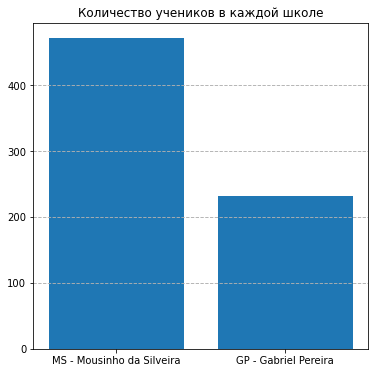

Школу Mousinho de Silveira посещают 471 ученика, школу Gabriel Pereira -- 232


In [28]:
rcParams['figure.figsize'] = 6, 6
students_number = data.drop_duplicates(subset='person_id')
students_number_count = students_number['school'].value_counts()
plt.title('Количество учеников в каждой школе')
plt.bar(['MS - Mousinho da Silveira', 'GP - Gabriel Pereira'], students_number_count)
plt.grid(linestyle='--', linewidth=0.9, axis='y')
plt.show()
print(f'Школу Mousinho de Silveira посещают {students_number_count[0]} ученика, школу Gabriel Pereira -- {students_number_count[1]}')

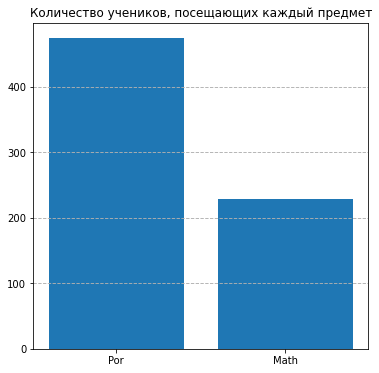

Португальский посещают 474, Математику -- 229


In [29]:
plt.title('Количество учеников, посещающих каждый предмет')
students_subject_count = students_number['Subject'].value_counts()
plt.bar(['Por', 'Math'], students_subject_count)
plt.grid(linestyle='--', linewidth=0.9, axis='y')
plt.show()
print(f'Португальский посещают {students_subject_count[0]}, Математику -- {students_subject_count[1]}')

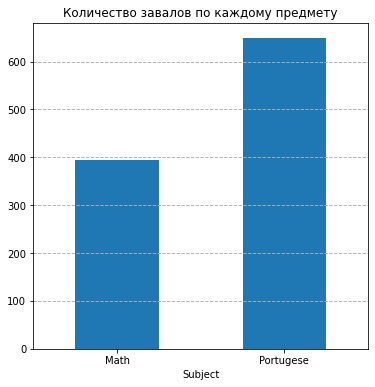

Португальский язык заваливают чаще, чем математику.


In [30]:
plt.grid(linestyle='--', linewidth=0.9, axis='y')
plt.grid(linestyle='--', linewidth=0, axis='x')
pd.crosstab(data['failures'], data['Subject'].map({'Por': 'Portugese', 'Math': 'Math'})).sum().plot(kind='bar',
                                                                                                 title='Количество завалов по каждому предмету',
                                                                                                 rot=0,
                                                                                                 grid=True)
plt.show()
print('Португальский язык заваливают чаще, чем математику.')

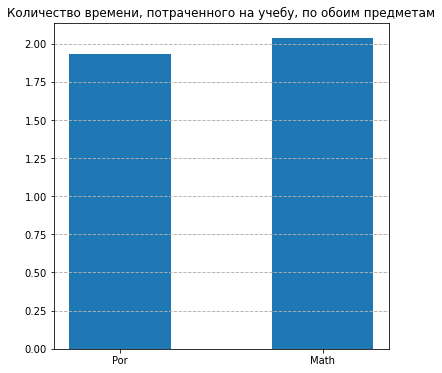

<Figure size 360x720 with 0 Axes>

Ученики трятят примерно одинаковое количество времени на обоих предметах, однако на математику в среднем требуется немного больше


In [31]:
Por_studytime_mean = data[data['Subject'] == 'Por']['studytime'].astype('int32').mean()
Math_studytime_mean = data[data['Subject'] == 'Math']['studytime'].astype('int32').mean()

plt.title('Количество времени, потраченного на учебу, по обоим предметам')
plt.bar(['Por', 'Math'], [Por_studytime_mean, Math_studytime_mean], width=0.5)

plt.grid(linestyle='--', linewidth=0.9, axis='y')
plt.grid(linestyle='--', linewidth=0, axis='x')
plt.figure(figsize=(5, 10))
plt.show()
print('Ученики трятят примерно одинаковое количество времени на обоих предметах, однако на математику в среднем требуется немного больше')

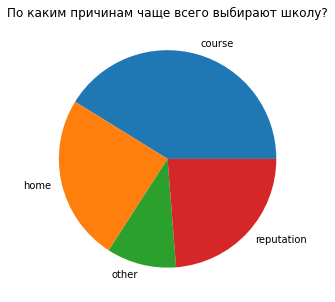

Школу чаще всего выбирают из-за читаемых там курсов.


In [32]:
df = data.groupby('reason').size()

df.plot(kind='pie', subplots=True, figsize=(5, 5))
plt.title('По каким причинам чаще всего выбирают школу?')
plt.ylabel('')
plt.show()
print('Школу чаще всего выбирают из-за читаемых там курсов.')

### Задание 5  
  
Оцените распределение оценок (отдельно для `G1`, `G2` и `G3`). Сравните распределения для разных предметов - математики и португальского языка. Сделайте выводы.  
  
**Tip:** Для выполнения задания пригодятся графики плотности, гистограммы и боксплоты.

In [33]:
def show_plot(i):
    if not i:
        title = 'math'
    else:
        title = 'por'
    plt.title(title)    
    plt.legend(notes)
    plt.show()

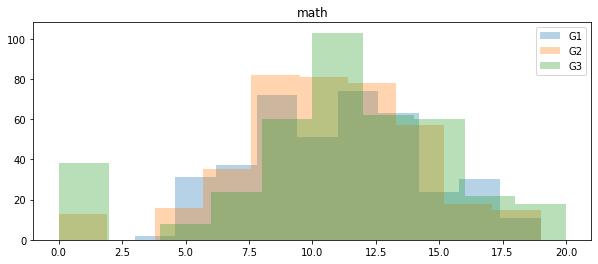

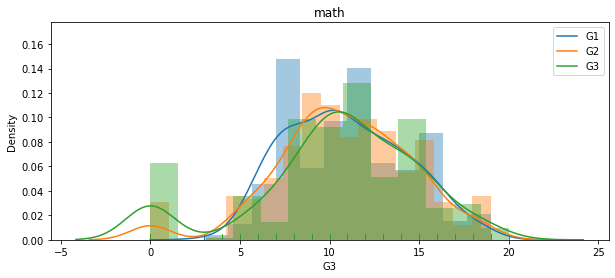

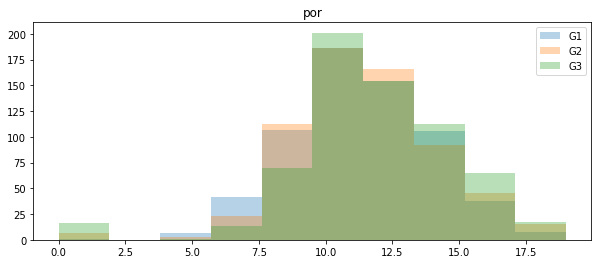

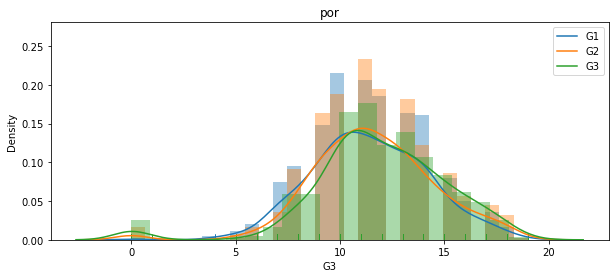

In [34]:
notes = ['G1', 'G2', 'G3']
math = data[data['Subject'] == 'Math']
por = data[data['Subject'] == 'Por']    
subjects = math, por

i = 0
for sub in subjects:
    plt.figure(figsize=(10, 4))
    for note in notes:
        plt.hist(sub[note], alpha=0.33)
    show_plot(i)
    
    plt.figure(figsize=(10, 4))
    for note in notes:
        sns.distplot(sub[note], kde=True, rug=True)

    show_plot(i)
    i += 1

## Вывод:
Количество наихудщих оценок (от 0 до 1) возрастает при выставлении годовых оценок по обоим предметам, причем по математике их в целом больше по сравнению с Португальским языком.

Реже всего учителя выставляют оценки в диапазоне от 2 до 5 по обоим предметам.

В целом распределение по предметам одинаково.

### Задание 6 
  
Оцените попарные зависимости числовых признаков.  
Рассчитайте и провизуализируйте матрицу корреляций. Дайте содержательный комментарий.

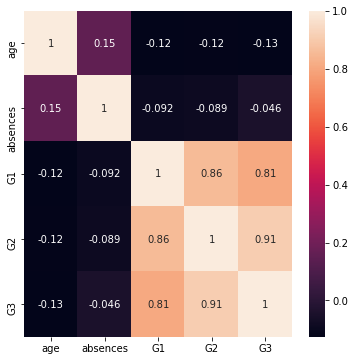

In [35]:
num_col = ['age', 'absences', 'G1', 'G2', 'G3']
num_data = data[num_col]

num_data_corr = num_data.corr()
sns.heatmap(num_data_corr, annot=True)
plt.show()

##### Комментарий:
Количество пропусков занятий и оценки друг с другом не коррелируют, хотя ожидалось, что, чем больше ученик пропускает уроков, тем ниже должны быть его отметки.

Полугодичные и итоговая оценка напрямую коррелируют между собой, что логично, хотя оценка за второе полугодие коррелирует немного больше по сравнению с оценкой за первое полугодие (коэффициенты корреляции 0.91 и 0.81 соответственно)

Наблюдается небольшая зависимость (коэф. 0.15) между возрастом и количеством отсутствий. Вывод: скорее всего это связано с тем, что, чем старше ученики, тем чаще они прогуливают уроки.

Оценки никак не коррелируют с возрастом, что логично.

### Задание 7  
  
Оцените попарные зависимости нечисловых (категориальных) признаков, дайте содержательный комментарий. 

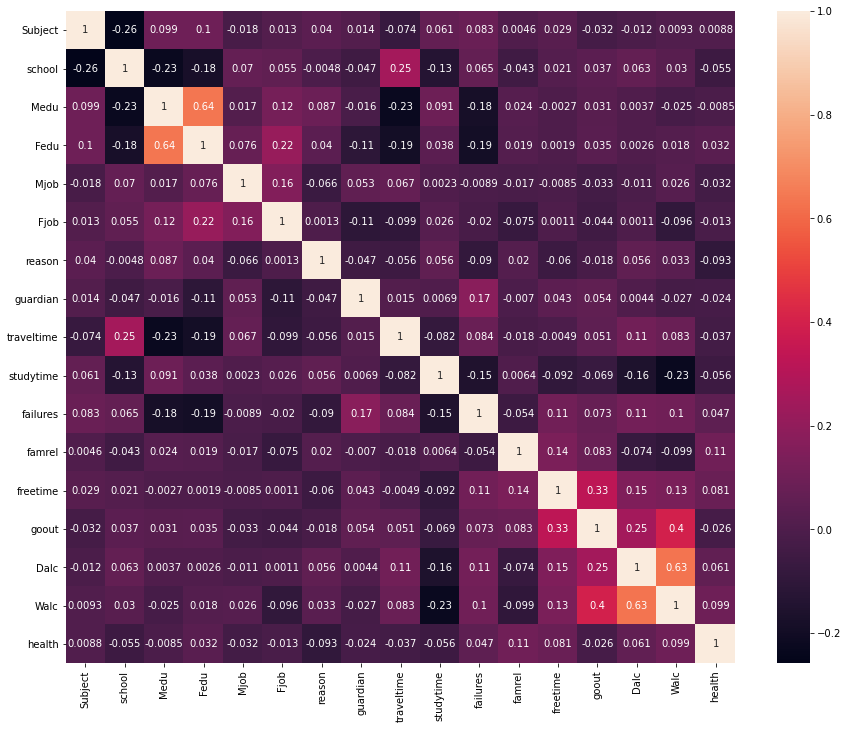

In [36]:
plt.figure(figsize=(15, 12))
cat_col = ['Subject', 'school', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 
           'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']

cat_data = data.copy()[cat_col]

categories = {'guardian': ['father', 'mother', 'other', 'futher'],
              'Mjob': ['other', 'services', 'health', 'teacher', 'at_home'],
              'Fjob': ['other', 'services', 'health', 'teacher', 'at_home'],
              'reason': ['course', 'home', 'reputation', 'other'], 
              'Subject': ['Por', 'Math'],
               'school': ['GP', 'MS']}

for cat in categories:
    for ind, v in enumerate(categories[cat]):
        cat_data[cat].replace(to_replace=v, value=ind, inplace=True)

cat_data = cat_data.dropna()
for col in cat_col:
    cat_data[col] = cat_data[col].astype('int32')
    
cat_data_corr = cat_data.corr()
sns.heatmap(cat_data_corr, annot=True)
plt.show()

#### Комментарий:
Как и ожидалось, в довольно сильной зависимости (0.4) между собой находятся признаки Walc и goout. Немного неожиданным оказалось, что такая зависимоть (даже приблизительно) не сохраняется у признаков Dalc и goout. Коэффициент корреляции здесь почти в 2 раза меньше по сравнению с первым случаем.
Кроме этого, Dalc и Walc коррелируют с признаком studytime: чем больше ученик учится, тем меньше он употребляет алкоголя. (Вполнее соотносится с принятыми стереотипами.)

Также, зависимость между Dalc и Walc вполне логична и равна 0.63.

Зависимость между goout И freetime тоже ожидаема.

Интересна отрицательная зависимость между failures и studytime: чем больше ученик учится, тем меньше у него несдач.

Положительная зависимость между traveltime и school объясняется тем, что "время до школы" является второй по популярности причиной выбора того или иного места обучения.

Довольно сильная зависимость наблюдает между Medu и Fedu (0.64): уровень образования супругов часто совпадает.
Интересное наблюдение: в то же время нет зависимости между Mjob и Medu (0.017). Небольшая корреляция между Fedu и Fjob всё-таки присутствует, однако она сильно меньше по сравнению с корреляцией Medu-Fedu (0.22 и 0.64 соответственно). Это говорит нам о том, что для мужчины образование играет более важную роль при выборе профессии. Отчасти это может объясняться тем, что раньше в принципе немногие женщины имели работу вне зависимости от образования. Этот факт мог отразиться на отсутствии зависимости Mjob-Medu.

Я ожидала увидеть зависимость между уровнем образования отца или матери и оценками их детей, поскольку образованные люди часто желают, чтобы их дети также получили высшее образование, а оценки играют в этом важную роль. Однако такой зависимости не наблюдается на графике.

### Задание  8  
  
* Оцените, есть ли разница в употреблении алкоголя между парнями и девушками. Кто пьет больше?
* Оцените связь употребления алкоголя с признаками: address, Pstatus, higher, romantic, freetime. 
* Оцените связь употребления алкоголя с уровнем образования опекуна (для случаев, где это известно).
* Сравните употребление алкоголя для 50 лучших учеников и 50 худших (по `G3`). Выполните сравнение отдельно для каждого предмета (`Math` и `Por`). Дайте содержательный комментарий.  
  
**Tip:** для выполнения задания пригодятся боксплоты и гистограммы. 

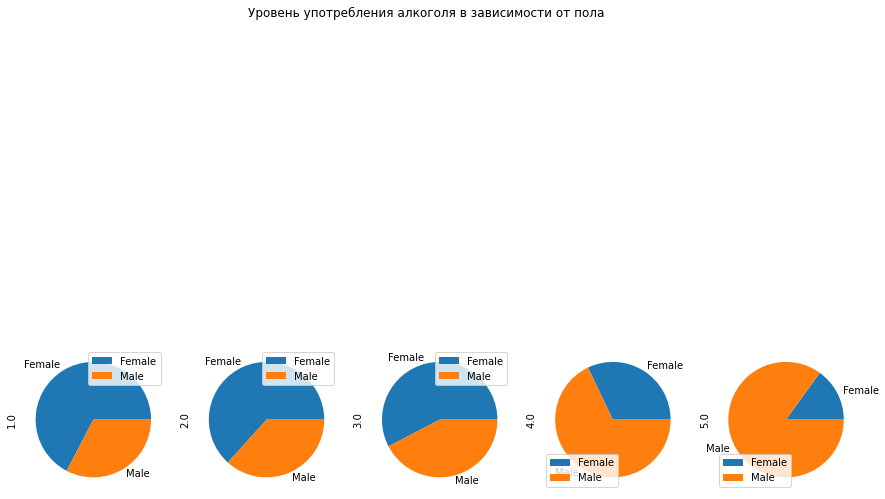

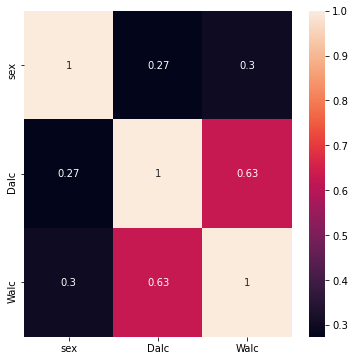

In [37]:
alc_sex_data = data[['sex', 'Dalc', 'Walc']].copy().dropna()

pd.crosstab(alc_sex_data['sex'].copy().map({False: 'Female', True: 'Male'}), alc_sex_data['Walc']).plot(kind='pie',
                                                                                                        title = 'Уровень употребления алкоголя в зависимости от пола',
                                                                                                        subplots=True,
                                                                                                        figsize=(15, 12))
plt.show()

for col in alc_sex_data.columns:
    alc_sex_data[col] = alc_sex_data[col].astype('int64')
    

alc_corr = alc_sex_data.corr()

alc_sex_data['sex'] = alc_sex_data['sex'].map({False: 'F', True:'M'})

sns.heatmap(data=alc_corr, annot=True)
plt.show()


##### Комментарий
В среднем девушки пьют меньше: количество девушек в категории 1 превосходит количество парней. В остальных же случаях: чем выше уровень употребления алкоголя, тем выше процент парней в этой категории; в категории 5 количество парней превосходит количество девушек в несколько раз!

Таблица корреляций поддтвержает зависимость от пола и употребления алкоголя, но коэф. зависимости не высок.

<AxesSubplot:>

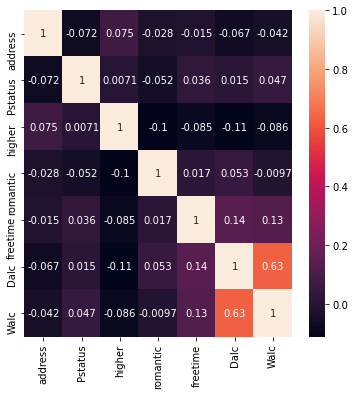

In [38]:
alc_corr_data = data.copy()[['address', 'Pstatus', 'higher', 'romantic', 'freetime', 'Dalc', 'Walc']].dropna()

for col in alc_corr_data.columns:
    alc_corr_data[col] = alc_corr_data[col].astype('int64')

alc_corr = alc_corr_data.corr()
sns.heatmap(data=alc_corr, annot=True)

##### Комментарий
Есть небольшая зависимость между Dalc-freetime и Dalc-freetime (коэф. 0.13 и 0.14 соответственно).

Помимо этого, можем наблюдать слабую обратную зависимость между Dalc и higher: если ученик планирует поступать в университет, он меньше употребляет алкоголь в будние дни.

<AxesSubplot:>

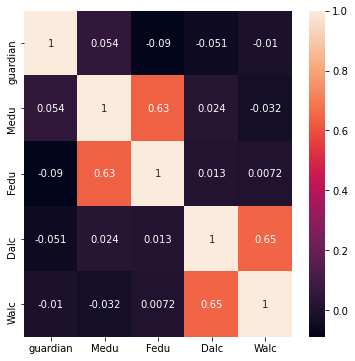

In [39]:
guardian_edu = numeric_data[['guardian', 'Medu', 'Fedu', 'Dalc', 'Walc']].dropna()

for col in guardian_edu.columns:
    guardian_edu[col] = guardian_edu[col].astype('int64')

guardian_edu = guardian_edu[guardian_edu['guardian'].isin([0, 1])]
guardian_edu_corr = guardian_edu.corr()
sns.heatmap(data=guardian_edu_corr, annot=True)

##### Комментарий
Зависимости между употреблением алкоголя и уровнем образования опекуна не наблюдается.

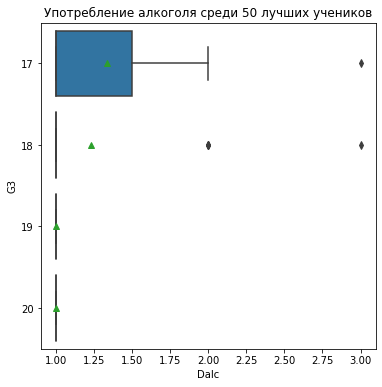

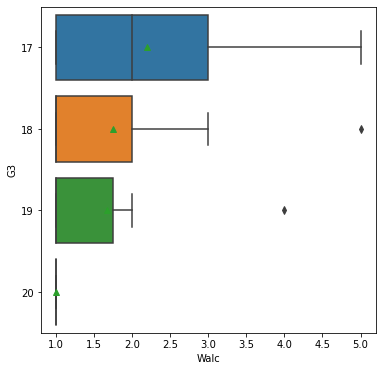

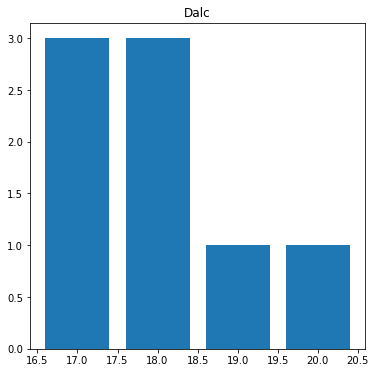

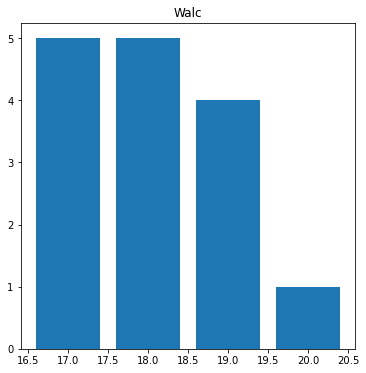

Средний уровень употребления алкоголя по будням среди лучших учеников: 1.2244897959183674
Средний уровень употребления алкоголя по выходным среди лучших учеников: 1.8571428571428572


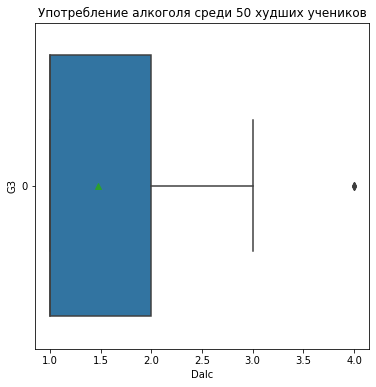

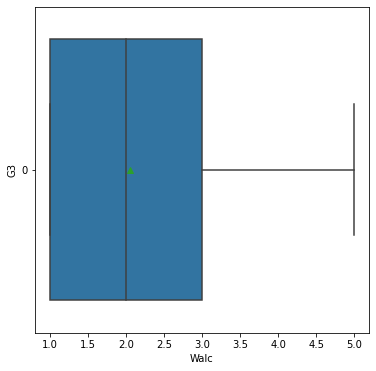

Средний уровень употребления алкоголя по будням среди лучших учеников: 1.48
Средний уровень употребления алкоголя по выходным среди лучших учеников: 2.06


In [40]:
# Сравните употребление алкоголя для 50 лучших учеников и 50 худших (по G3).
# Выполните сравнение отдельно для каждого предмета (Math и Por). Дайте содержательный комментарий.

best = data[data.index.isin(data['G3'].nlargest(50).index)]
worst = data[data.index.isin(data['G3'].nsmallest(50).index)]

plt.title('Употребление алкоголя среди 50 лучших учеников')
sns.boxplot(y=best['G3'], x=best['Dalc'], orient='h', showmeans=True)
plt.show()
sns.boxplot(y=best['G3'], x=best['Walc'], orient='h', showmeans=True)
plt.show()

plt.title('Dalc')
plt.bar(best['G3'], best['Dalc'])
plt.show()
plt.title('Walc')
plt.bar(best['G3'], best['Walc'])
plt.show()
print('Средний уровень употребления алкоголя по будням среди лучших учеников:', best['Dalc'].mean())
print('Средний уровень употребления алкоголя по выходным среди лучших учеников:', best['Walc'].mean())

plt.title('Употребление алкоголя среди 50 худших учеников')
sns.boxplot(y=worst['G3'], x=worst['Dalc'], orient='h', showmeans=True)
plt.show()
sns.boxplot(y=worst['G3'], x=worst['Walc'], orient='h', showmeans=True)
plt.show()
print('Средний уровень употребления алкоголя по будням среди лучших учеников:', worst['Dalc'].mean())
print('Средний уровень употребления алкоголя по выходным среди лучших учеников:', worst['Walc'].mean())


##### Комментарий:
Существенных различий в уровне употребления алкоголя среди лучших и худших учеников не наблюдается. Среднее значение отличается лишь на 0.26. Если округить до целых чисел, получится, что для обоих групп средний показатель равень единице. 

Среди 50 лучших наблюдаются различия среди тех, кто имеет оценки 17-18 и 19-20: среди первых средний показатель гораздо выше по сравнению со вторыми.

Обе группы по выходным пьют больше по сравнению с будними днями, однако те, кто плохо учится,пьют больше тех, кто имеет лучшие оценки. (среднее 2.06 и 1.85 соответственно)

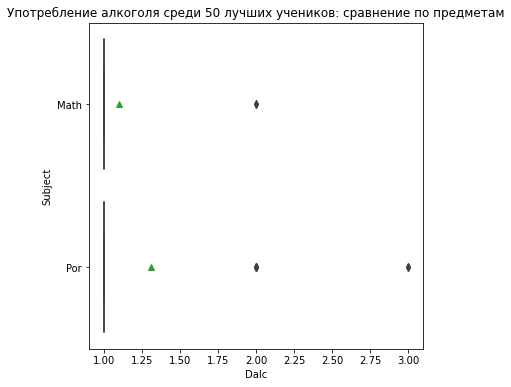

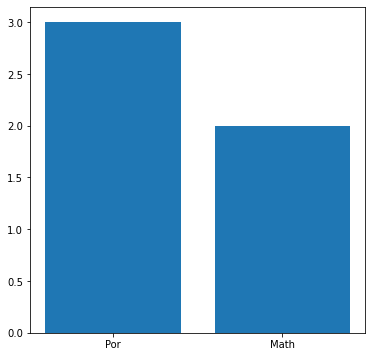

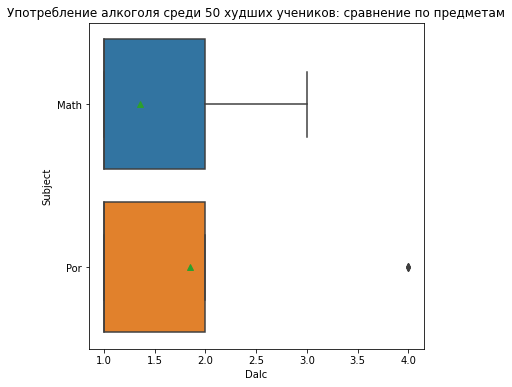

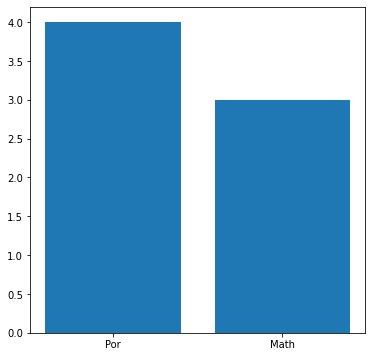

In [41]:
plt.title('Употребление алкоголя среди 50 лучших учеников: сравнение по предметам')
sns.boxplot(y=best['Subject'], x=best['Dalc'], orient='h', showmeans=True)
plt.show()

plt.bar(best['Subject'], best['Dalc'])
plt.show()

plt.title('Употребление алкоголя среди 50 худших учеников: сравнение по предметам')
sns.boxplot(y=worst['Subject'], x=worst['Dalc'], orient='h', showmeans=True)
plt.show()
plt.bar(worst['Subject'], worst['Dalc'])
plt.show()


##### Комментарий:
Изучающие Португальский язык в среднем пьют больше изучающих математику в обеих группах. Однако значения сами по себе по обоим предметам выше в группе с плохими оценками: Por - 4, Math - 3 (ср. с отличниками: Por - 3, Math - 2)

### Задание 9     
  
Оцените зависимость итоговой оценки от следующих признаков: 
  
* Пола
* Времени в пути от дома до школы
* Наличия дополнительной помощи в учебе (от членов семьи или вообще)
* Посещения платных дополнительных занятий
* Наличия интернета
* Наличия романтических отношений
* Употребления алкоголя  

<AxesSubplot:>

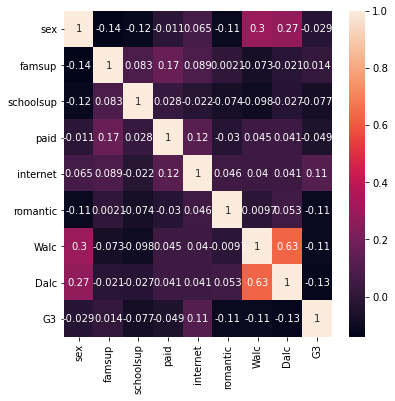

In [42]:
note_corr = data[['sex', 'traveltime', 'famsup', 'schoolsup', 'paid', 'internet', 'romantic', 'Walc', 'Dalc', 'G3']].dropna().corr()

sns.heatmap(data=note_corr, annot=True)

##### Комментарий
Небольшая отрицательная зависимость наблюдается между итоговой оценкой и употреблением алкоголя по будням.

Есть положительная зависимость между итоговой оценкой и наличием интернета (0.11)
Такая же по модулю и противоположная по знаку зависимость имеется между G3 и romantic.

От остальных признаков итоговая оценка не зависит.

### Задание 10  
  
Добавьте в данные новый признак - итоговая оценка по 4-х балльной шкале:  

* Отлично: 18 <= `G3` <= 20
* Хорошо: 14 <= `G3` <= 17
* Удовлетворительно: 8 <= `G3` <= 13
* Неудовлетворительно: `G3` < 8  
  
Оцените распределение нового признака в зависимости от признака `reason` (причина выбора школы). Дайте содержательный комментарий. 

In [43]:
data['score'] = [''] * len(data)

In [44]:
for i in range(len(data)):
    if data.at[i, 'G3'] in range(18, 21):
        data.at[i, 'score'] = 'Отлично'
    elif data.at[i, 'G3'] in range(14, 18):
        data.at[i, 'score'] = 'Хорошо'
    elif data.at[i, 'G3'] in range(8, 14):
        data.at[i, 'score'] = 'Удовлетворительно'
    else:
        data.at[i, 'score'] = 'Неудовлетворительно'

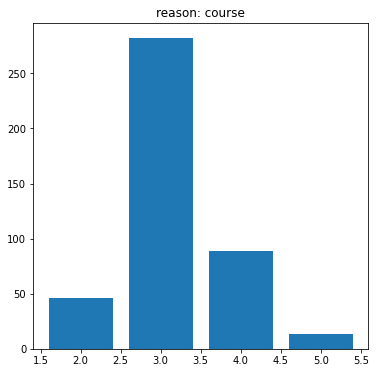

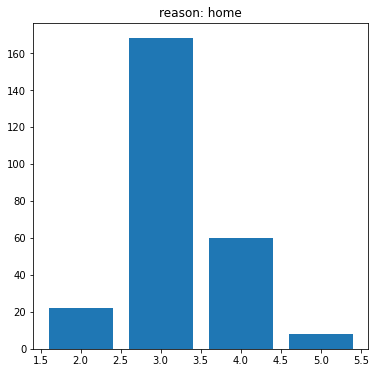

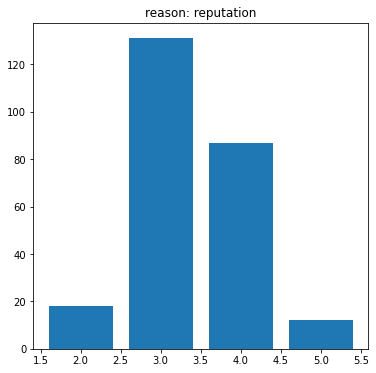

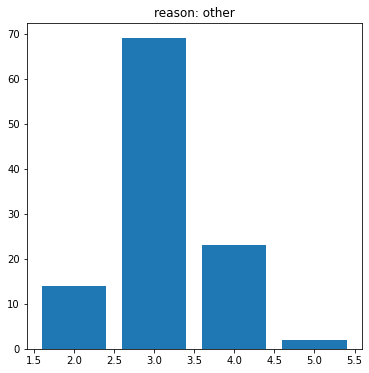

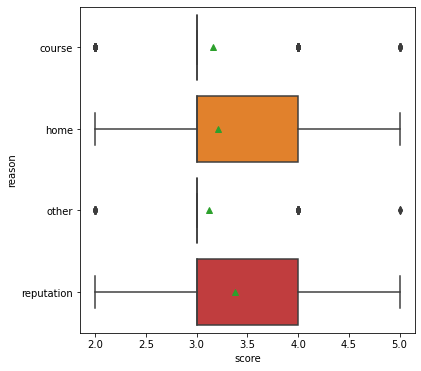

In [45]:
data_copy = data.copy()[['score', 'reason']]
data_copy['score'] = data['score'].copy().map({'Отлично': 5, 'Хорошо': 4, 'Удовлетворительно': 3, 'Неудовлетворительно': 2})

#pd.crosstab(data_copy['score'], data_copy['reason']).plot(kind='bar')

for reason in data_copy['reason'].unique():
    plt.title('reason: '+ reason)
    reason_data = data_copy[data_copy['reason'] == reason]
    plt.bar(reason_data['score'].value_counts().index, list(reason_data['score'].value_counts().astype('int')))
    plt.show()
    
sns.boxplot(x=data_copy['score'], y=data_copy['reason'], showmeans=True)
plt.show()

##### Комметарий:

Из графиков видно, что в целом оценки не сильно отличаются в зависимости от причины выбора школы. Однако из boxplot можем заметить, что средняя оценка немного выше у тех, кто указала "reputation" как причину выбора той или иной школы.

На втором месте по средней оценке находится причина "home".

На третьем месте -- "course", на четвертом -- "other".

Из бар чартов видно, что оценки по частоте распределены одинаково во всех категориях, меняется лишь из соотношение.

Самая частая оценка среди всех категорий -- "удовлетворительно". Дальше с большим отрывом идет "хорошо" во всех категориях кроме "reputation" (здесь отрыв меньше), поэтому и средняя оценка здесь выше.

### Задание  11 <a id="task11"></a>  
  
Часть из представленных в данных студентов посещали оба курса - `Math` и `Por`.  
* Предложите способ идентификации студентов и определите тех, кто посещал оба курса. Сколько таких студентов?  
* Для этих студентов сравните оценки по двум предметам, дайте комментарий.  
  
**Note:** Столбец `ID` является уникальным идентификатором наблюдения, но не студента. Он будет уникален для каждой строки.

In [46]:
# способ идентификации см задание 1

both_courses = len(data['person_id'].value_counts() == 2)
print(both_courses, 'ученика посещают оба курса')

703 ученика посещают оба курса


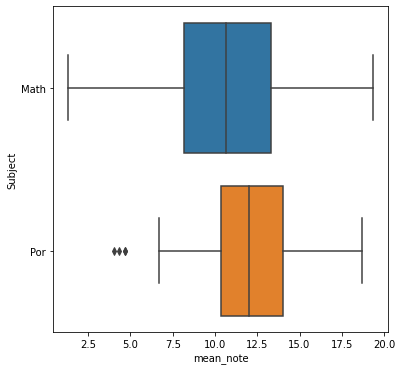

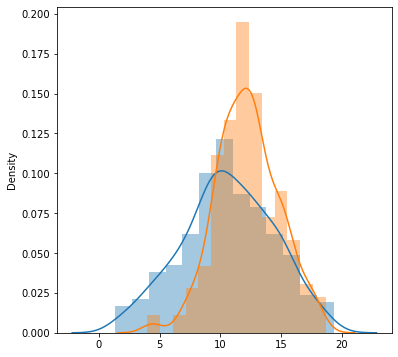

In [47]:
both_courses = data[ids.isin(ids[ids.duplicated()])][['person_id', 'G1', 'G2', 'G3', 'Subject']].sort_values('person_id')

both_courses['mean_note'] = [(both_courses.at[i, 'G1'] + both_courses.at[i, 'G2'] + both_courses.at[i, 'G3']) / 3 for i in both_courses.index]

math = both_courses[both_courses['Subject'] == 'Math']
por = both_courses[both_courses['Subject'] == 'Por']
sns.boxplot(x=both_courses['mean_note'], y=both_courses['Subject'])
plt.show()

sns.distplot(x=math['mean_note'])
sns.distplot(x=por['mean_note'])
plt.show()

##### Комментарий:

Средняя оценка по Португальскому языку выше, чем по математике.
Большинство оценкок по математике сосредоточено в диапазоне от 9 до 14. Оценки по Португальскому распределены более равномерно.

<AxesSubplot:title={'center':'Таблица зависимостей между оценками и предметом'}>

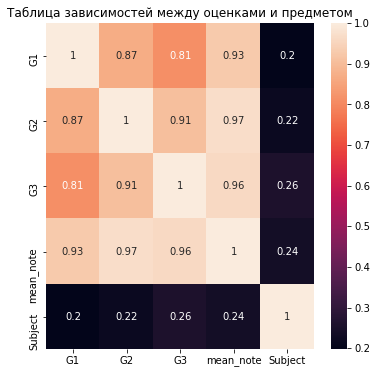

In [48]:
plt.title('Таблица зависимостей между оценками и предметом')
both_courses['Subject'] = both_courses['Subject'].map({'Math': 1, 'Por': 2}).dropna().astype('int')
both_courses_corr = both_courses[['G1', 'G2', 'G3', 'mean_note', 'Subject']].corr()
sns.heatmap(data=both_courses_corr, annot=True)

##### В Комментарий:
В целом, оценки не сильно коррелируют с изучаемым предметом, но, как уже было сказано, по Португальскому языку оценки в среднем немного выше.

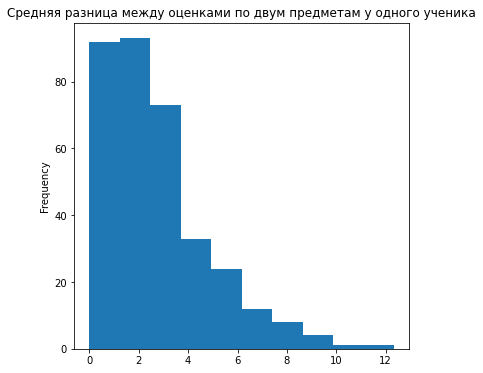

Средняя разность между оценками по двум предметам: 2.714565004887587


In [49]:
people = pd.DataFrame(both_courses['person_id'])

plt.title('Средняя разница между оценками по двум предметам у одного ученика')
mean_diff = both_courses.groupby('person_id').apply(lambda x: abs(list(x['mean_note'])[0] - list(x['mean_note'])[1]))

mean_diff.plot(kind='hist')
plt.show()

print('Средняя разность между оценками по двум предметам:', mean_diff.mean())

##### Комментарий:

Чаще всего оценки по двум предметам различаются друг от друга не более чем на 4 балла, что говорит на о том, что ученики чаще всего не делятся на "гумманитариев" и "технарей" и имеют равные способности к предметам из разных областей знания. Хотя иногда встречаются случаи, когда разница в оценках может достигать от 10 до 14 баллов. Такие ученики скорее всего заинтересованны в одном предмете гораздо больше, чем во втором.

### Задание 12  
  
Предложите простую модель для определения (предсказания) итоговой оценки студента по 4-х балльной системе. Оцените точность предложенной модели. 

In [50]:
data_learn = numeric_data.copy()
data_answer = data.copy()

del data_learn['cheating']
del data_answer['cheating']

data_learn = data_learn.dropna()
data_answer = data_answer.dropna()

In [51]:
check_inds = random.choices(list(data_learn.index), k=10)
check = data_learn[data_learn.index.isin(check_inds)]
check_answer = data_answer[data_answer.index.isin(check_inds)]['score']

data_learn = data_learn.drop(data_learn.index[check_inds])
data_answer = data_answer.drop(data_answer.index[check_inds])

X = data_learn
y = data_answer['score']

In [56]:
kf = sklearn.model_selection.KFold(n_splits=3)

scores = []
model = DecisionTreeClassifier()

for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = X[X.index.isin(train)], X[X.index.isin(test)], y[y.index.isin(train)], y[y.index.isin(test)]
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

print('Точность модели:', np.mean(scores) * 100, '%')

Точность модели: 100.0 %


In [53]:
predictions = list(model.predict(check))

In [54]:
#проверим модель
for i in range(10):
    predictions[i]
    print(f'prediction: {predictions[i]}\nanswer:     {list(check_answer)[i]}')
    print('-----------')

prediction: Хорошо
answer:     Хорошо
-----------
prediction: Удовлетворительно
answer:     Удовлетворительно
-----------
prediction: Удовлетворительно
answer:     Удовлетворительно
-----------
prediction: Удовлетворительно
answer:     Удовлетворительно
-----------
prediction: Удовлетворительно
answer:     Удовлетворительно
-----------
prediction: Удовлетворительно
answer:     Удовлетворительно
-----------
prediction: Хорошо
answer:     Хорошо
-----------
prediction: Удовлетворительно
answer:     Удовлетворительно
-----------
prediction: Удовлетворительно
answer:     Удовлетворительно
-----------
prediction: Удовлетворительно
answer:     Удовлетворительно
-----------
